In [11]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from matplotlib.lines import Line2D
from warnings import filterwarnings
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv("file:///F:/bestsellers%20with%20categories.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
df['Author'].unique()

array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Jaycee Dugard', "Madeleine L'Engle", 'Steve Harvey',
       'Adult Coloring Book Designs', 'Blue Star Coloring',
       'Coloring Books for Adults', 'Ron Chernow', 'Anthony Doerr',
       'Veronica Roth', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Mark Twain', 'DK', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Jeff Kinney', "Sasha O'Hara", 'David Goggins', 'Thomas Piketty',
       'Suzanne Collins', 'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan',
       'Marjorie Sarnat', 'Abraham Verghese', 'Brené Brown',
       'Malcolm Gladwell', 'Charlaine Harris', 'Rod Campbell',
       'George W. Bush', 'Tony Hsieh', 'American Psych

লেখকের কিছু নাম ভুল বানানযুক্ত হয়েছে তাই আমরা ভুলগুলি প্রথমে সংশোধন করতে ডেটা ম্যানিপুলেট করব।

In [5]:
df.loc[df['Author']=='J. K. Rowling','Author']='J.K. Rowling'
df.loc[df['Author']=='George R. R. Martin','Author']='George R.R. Martin'

In [6]:
df.sort_values('Reviews',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


In [7]:
df.drop_duplicates('Name').sort_values('Reviews',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction


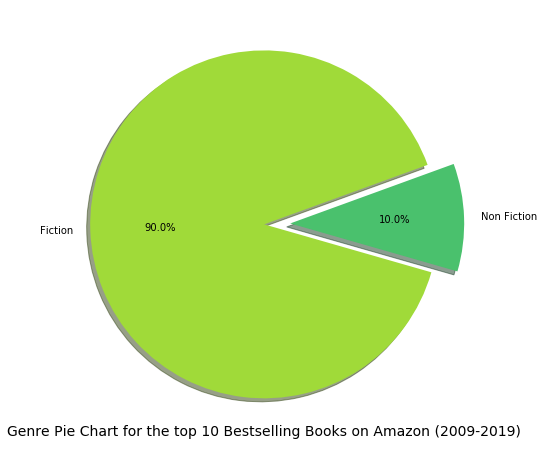

In [8]:
pie_1 = df.drop_duplicates('Name').sort_values('Reviews',ascending=False)['Genre'].head(10).value_counts()

sns.set_palette('viridis_r')
plt.figure(figsize=(8,8))
plt.pie(pie_1,explode = [0,0.15],labels=['Fiction','Non Fiction'],autopct='%.1f%%',shadow=True,startangle=20)
plt.title('Genre Pie Chart for the top 10 Bestselling Books on Amazon (2009-2019)',fontdict={'size':14},y=0);

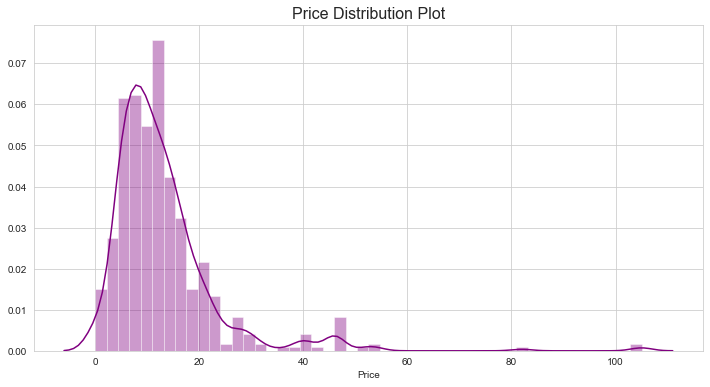

In [12]:
plt.figure(figsize=(12,6))
sns.distplot(df['Price'],color='purple')
plt.title('Price Distribution Plot',fontsize=16)
plt.show()
filterwarnings('ignore')

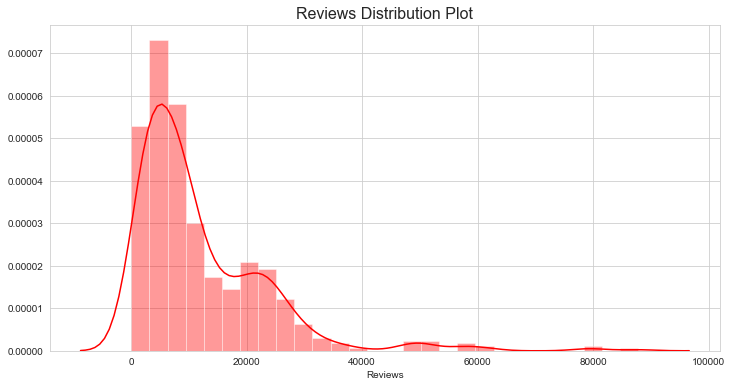

In [13]:
plt.figure(figsize=(12,6))
sns.distplot(df['Reviews'],color='red')
plt.title('Reviews Distribution Plot',fontsize=16)
plt.show()
filterwarnings('ignore')

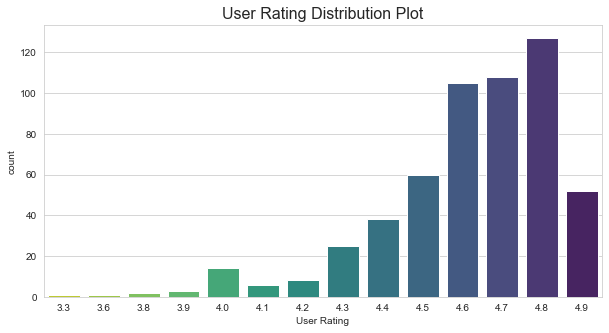

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['User Rating'],palette='viridis_r')
plt.title('User Rating Distribution Plot',fontsize=16)
plt.show()

In [16]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


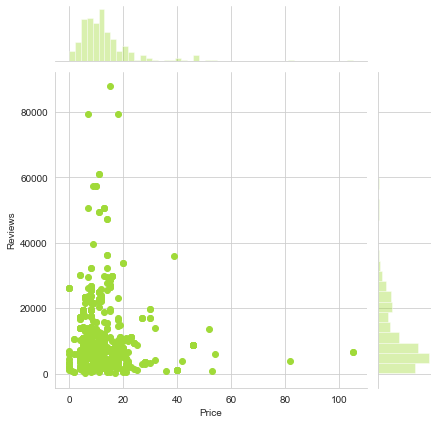

In [22]:
sns.jointplot(x='Price',y='Reviews',data=df)
plt.show()

In [26]:
from collections import Counter

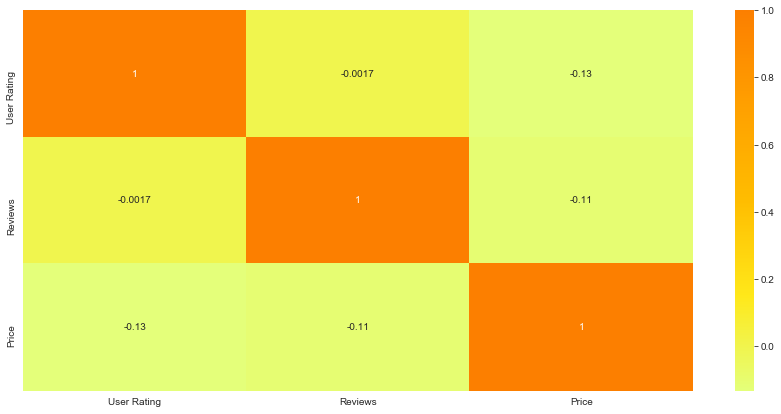

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(df.drop(['Name','Genre','Author','Year'],axis=1).corr(),cmap='Wistia',annot=True)
plt.show()

In [32]:
Counter(df.drop_duplicates('Name')['Author']).most_common()[0]

('Jeff Kinney', 12)

In [33]:
new_df = df.drop_duplicates('Name')
new_df[new_df['Author']=='Jeff Kinney']

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction


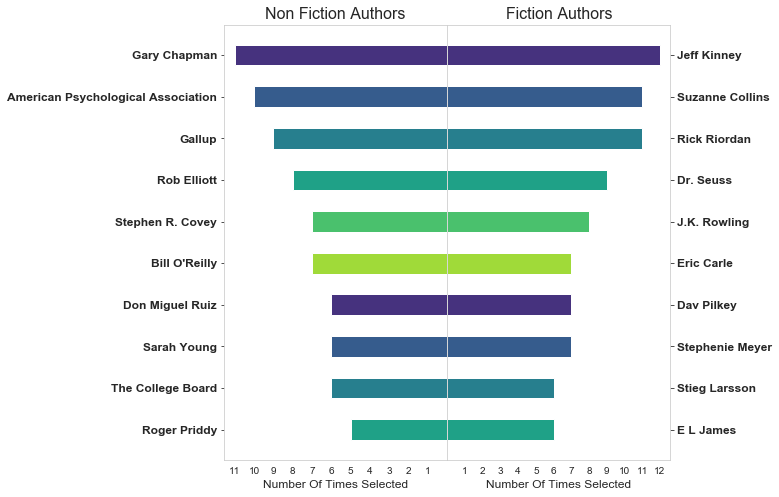

In [34]:
best_nf_books = df.groupby(['Author', 'Genre']).count().unstack()['Name']['Non Fiction'].sort_values(ascending=False)[:10]
best_f_books = df.groupby(['Author', 'Genre']).count().unstack()['Name']['Fiction'].sort_values(ascending=False)[:10]

color=sns.color_palette('viridis')

sns.set_style('whitegrid')

fig,axes = plt.subplots(1,2,figsize=(8,8))
plt.subplots_adjust(wspace=0)

axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_left()
axes[0].grid(None)
axes[0].set_xticks(range(1,int(best_nf_books.values.max())+1))
axes[0].barh(y=best_nf_books.index,width=best_nf_books.values,height=0.5,tick_label=best_nf_books.index,color=color)
axes[0].set_yticklabels(best_nf_books.index,fontweight='semibold',fontsize=12)
axes[0].set_title('Non Fiction Authors',fontdict={'size':16})
axes[0].set_xlabel('Number Of Times Selected',fontsize=12)

axes[1].set_xticks(range(1,int(best_f_books.values.max())+1))
axes[1].invert_yaxis()
axes[1].yaxis.tick_right()
axes[1].grid(None)
axes[1].barh(y=best_f_books.index,width=best_f_books.values,height=0.5,tick_label=best_f_books.index,color=color)
axes[1].set_yticklabels(best_f_books.index,fontweight='semibold',fontsize=12)
axes[1].set_title('Fiction Authors',fontdict={'size':16})
axes[1].set_xlabel('Number Of Times Selected',fontsize=12)

plt.show()

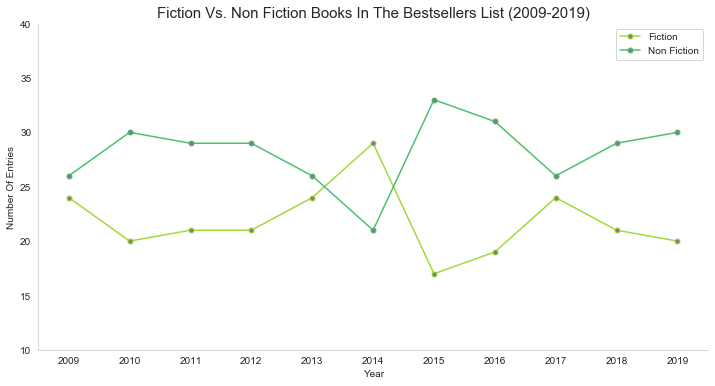

In [35]:
books = df.groupby(['Year','Genre']).count().unstack()['Name']

fig,axes=plt.subplots(1,1,figsize=(12,6))
sns.set_style('white')
axes.plot(books,markersize=5,markerfacecolor='grey',marker='o')
axes.set_xlabel('Year')
axes.set_ylabel('Number Of Entries')
axes.set_xticks(books.index)
axes.set_ylim(10,40)
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.legend(books)
axes.set_title('Fiction Vs. Non Fiction Books In The Bestsellers List (2009-2019)',fontdict={'size':15})
plt.grid(0)

plt.show()

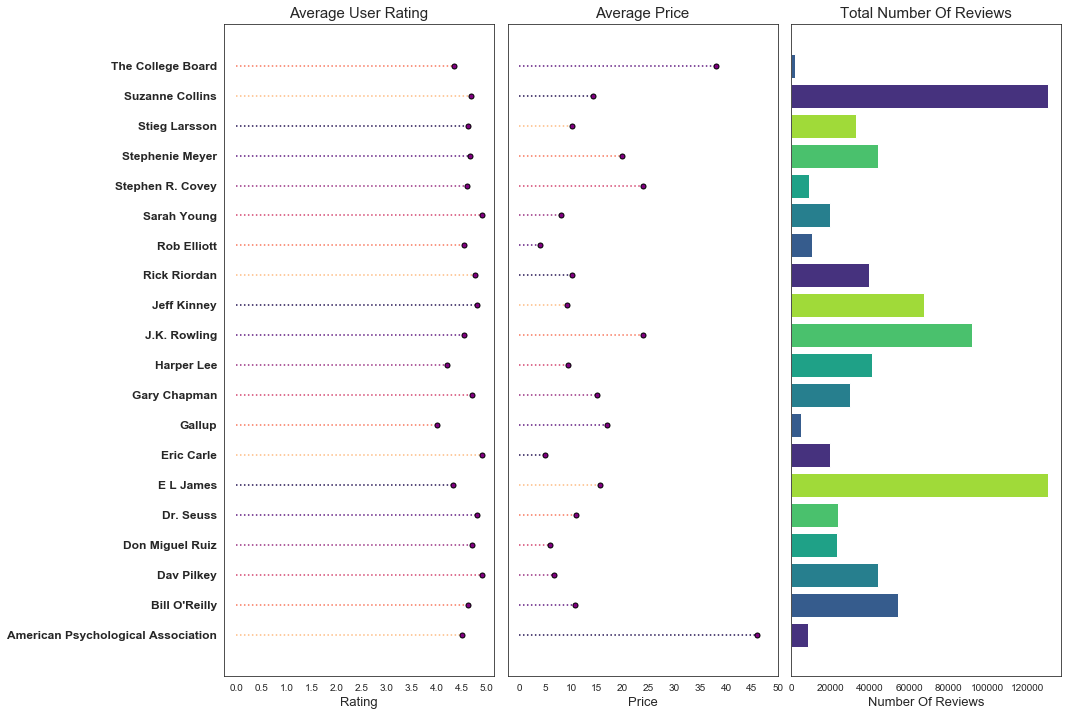

In [36]:
color=sns.color_palette('viridis')
c1=sns.color_palette('magma')
c2=sns.color_palette('magma_r')

new_df = df.drop_duplicates('Name')

df1 = df.groupby('Author').count().sort_values('Name',ascending=False)[:20]
index = df1.index
main_df = pd.DataFrame(new_df[df['Author']==index[0]])

for i in index[1:]:
    sub_df = new_df[new_df['Author']==i]
    main_df = pd.concat([main_df,sub_df])
    

main_df1 = main_df.groupby('Author').sum()
main_df2 = main_df.groupby('Author').mean()

fig, ax = plt.subplots(1,3,figsize=(15,12),sharey=True)
plt.subplots_adjust(wspace=0.05)

ax[0].hlines(xmin=0,xmax=main_df2['User Rating'].values,y=main_df2['User Rating'].index,linestyle='dotted',color=c2)
ax[0].plot(main_df2['User Rating'].values,main_df2.index,'o',markersize=5,markerfacecolor='purple',markeredgecolor='black')
ax[0].set_xticks(np.linspace(0,5,11))
ax[0].set_xlabel('Rating',fontsize=13)
ax[0].set_title('Average User Rating',fontsize=15)
ax[0].set_yticklabels(main_df2['User Rating'].index,fontweight='bold',fontsize=12)

ax[1].hlines(xmin=0,xmax=main_df2['Price'].values,y=main_df2['Price'].index,linestyle='dotted',color=c1)
ax[1].plot(main_df2['Price'].values,main_df2.index,'o',markersize=5,markerfacecolor='purple',markeredgecolor='black')
ax[1].set_xticks(list(range(0,51,5)))
ax[1].set_xlabel('Price',fontsize=13)
ax[1].set_title('Average Price',fontsize=15)

ax[2].barh(y=main_df1['Reviews'].index,width=main_df1['Reviews'].values,color=color)
ax[2].set_xlabel('Number Of Reviews',fontsize=13)
ax[2].set_title('Total Number Of Reviews',fontsize=15)

plt.show()
filterwarnings('ignore')

In [37]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


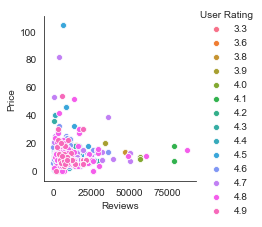

In [42]:
sns.FacetGrid(df,hue='User Rating').map(sns.scatterplot,'Reviews','Price').add_legend()

In [44]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [49]:
IQR_r = df['Reviews'].quantile(0.75)-df['Reviews'].quantile(0.25)

upper_limit = df['Reviews'].quantile(0.75)+IQR_r*1.5
lower_limit = df['Reviews'].quantile(0.75)-IQR_r*1.5

ex_lower_limit = df['Reviews'].quantile(0.75)-IQR_r*3
ex_upper_limit = df['Reviews'].quantile(0.75)+IQR_r*3

print('Outlier\'s range :\t',[lower_limit,upper_limit])
print('Extreme Outlier\'s range:',[ex_lower_limit,ex_upper_limit])

Outlier's range :	 [-2539.625, 37046.125]
Extreme Outlier's range: [-22332.5, 56839.0]
